In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [2]:
def plot_graph(G):
    """Plot the graph."""
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', edge_color='gray')
    plt.show()

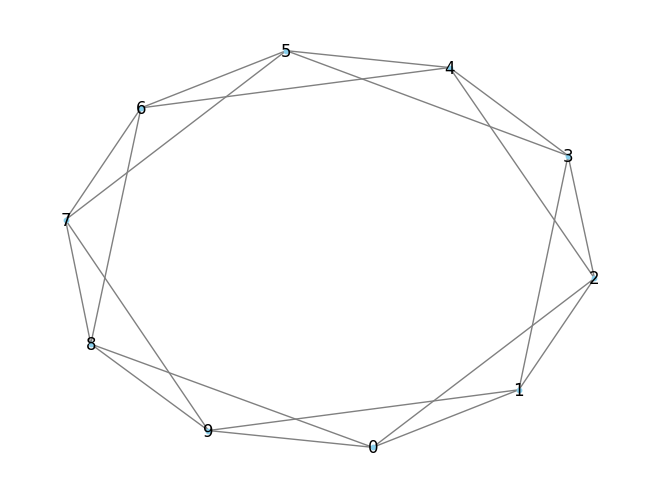

In [6]:
def generate_ring_lattice():
    """Generate a regular ring lattice with 10 vertices and 2 nearest neighbors."""
    return nx.watts_strogatz_graph(10, 4, 0)

G_ring_lattice = generate_ring_lattice()
plot_graph(G_ring_lattice)

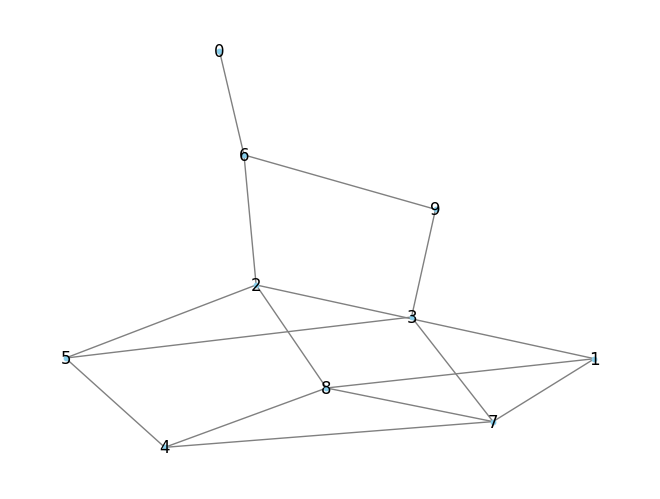

In [7]:
def generate_random_graph():
    """Generate a random graph with 10 vertices and 15 edges."""
    return nx.gnm_random_graph(10, 15)

G_random = generate_random_graph()
plot_graph(G_random)

E1 edges 
 {(3, 4), (4, 6), (5, 7), (0, 2), (8, 9), (0, 8), (1, 3), (1, 9), (6, 8), (4, 5), (5, 6), (0, 1), (2, 4), (1, 2), (7, 9), (6, 7), (3, 5), (0, 9), (2, 3), (7, 8)}
E2 edges 
 {(1, 2), (3, 7), (1, 8), (0, 6), (1, 7), (4, 5), (2, 6), (3, 9), (4, 8), (7, 8), (2, 5), (6, 9), (4, 7), (3, 5), (2, 8)}
E_common edges 
 {(4, 5), (1, 2), (3, 5), (7, 8)}
E1_exclusive edges 
 [(0, 1), (2, 4), (3, 4), (6, 8), (4, 6), (0, 9), (5, 7), (7, 9), (6, 7), (0, 2), (8, 9), (2, 3), (5, 6), (0, 8), (1, 3), (1, 9)]
E2_exclusive edges 
 [(3, 7), (1, 8), (0, 6), (1, 7), (2, 6), (3, 9), (4, 8), (2, 5), (6, 9), (4, 7), (2, 8)]
E_from_G1 edges 
 [(2, 4)]
E_from_G2 edges 
 [(1, 8), (6, 9), (3, 7), (4, 8), (2, 5), (4, 7), (1, 7), (2, 8), (0, 6)]
E_morph edges 
 [(4, 5), (1, 2), (3, 5), (7, 8), (2, 4), (1, 8), (6, 9), (3, 7), (4, 8), (2, 5), (4, 7), (1, 7), (2, 8), (0, 6)]


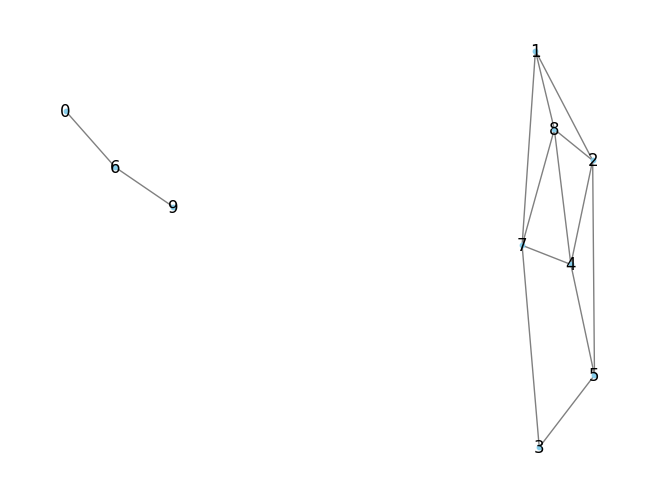

In [8]:
def morph_graphs(G1, G2, p):
    V = set(G1.nodes())  # Set of vertices in G1
    """Create a p-morph of G1 and G2."""
    E1 = set(G1.edges())
    E2 = set(G2.edges())
    print("E1 edges \n", E1)
    print("E2 edges \n", E2)
    E_common = E1 & E2  # Edges common to both graphs
    print("E_common edges \n", E_common)
    E1_exclusive = list(E1 - E2)  # Edges unique to G1
    print("E1_exclusive edges \n", E1_exclusive)
    E2_exclusive = list(E2 - E1)  # Edges unique to G2
    print("E2_exclusive edges \n", E2_exclusive)
    
    # Take a fraction of exclusive edges from each graph
    E_from_G1 = random.sample(E1_exclusive, int(p * len(E1_exclusive)))
    print("E_from_G1 edges \n", E_from_G1)
    E_from_G2 = random.sample(E2_exclusive, int((1 - p) * len(E2_exclusive)))
    print("E_from_G2 edges \n", E_from_G2)

    # Create the new graph by combining these edges
    E_morph = list(E_common) + E_from_G1 + E_from_G2
    print("E_morph edges \n", E_morph)
    
    G_morph = nx.Graph()
    G_morph.add_nodes_from(V)  # Add vertices to the new graph
    G_morph.add_edges_from(E_morph)  # Add edges to the new graph
    return G_morph

G_morph = morph_graphs(G_ring_lattice, G_random, 0.1)
chromatic_number = nx.algorithms.coloring.greedy_color(G_morph)
plot_graph(G_morph)